In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
saAqar = pd.read_csv('SA_Aqar.csv')

In [6]:
saAqar.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


In [8]:
saAqar.shape

(3718, 24)

In [10]:
saAqar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        3718 non-null   int64 
 19  stairs

In [12]:
saAqar.isnull().sum()

city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         80
dtype: int64

In [14]:
columns_to_drop = ['details']
saAqar = saAqar.drop(columns=columns_to_drop)

In [16]:
saAqar.duplicated().sum()

2207

In [18]:
saAqar.drop_duplicates(inplace=True)

In [20]:
saAqar["price"] = saAqar["price"].apply(lambda v: (v - saAqar["price"].min()) / (saAqar["price"].max() - saAqar["price"].min()))

In [22]:
saAqar["city"].unique()

array([' الرياض', ' جدة', ' الدمام', ' الخبر'], dtype=object)

In [24]:
saAqar["city"] = saAqar["city"].str.strip()

city_mapping = {
    "الرياض": 1,
    "جدة": 2,
    "الدمام": 3,
    "الخبر": 4
}


saAqar["city"] = saAqar["city"].replace(city_mapping)

In [26]:
saAqar["district"].unique()

array(['   حي العارض ', '   حي القادسية ', '   حي المعيزلة ',
       '   حي العليا ', '   حي الازدهار ', '   حي المهدية ',
       '   حي الحزم ', '   حي الصحافة ', '   حي بنبان ',
       '   حي النسيم الغربي ', '   حي النرجس ', '   حي الملز ',
       '   حي الياسمين ', '   حي المونسية ', '   حي السليمانية ',
       '   حي العقيق ', '   حي المرسلات ', '   حي الرحمانية ',
       '   حي الرمال ', '   حي طويق ', '   حي الملقا ', '   حي النزهة ',
       '   حي الربيع ', '   حي ظهرة لبن ', '   حي الروضة ', '   حي عكاظ ',
       '   حي الورود ', '   حي الفيحاء ', '   حي النموذجية ',
       '   حي الربوة ', '   حي القيروان ', '   حي عليشة ',
       '   حي الملك فيصل ', '   حي حطين ', '   حي المناخ ',
       '   حي البديعة ', '   حي الشهداء ', '   حي قرطبة ',
       '   حي العريجاء الغربية ', '   حي النفل ', '   حي القدس ',
       '   حي الملك فهد ', '   حي العزيزية ', '   حي الواحة ',
       '   حي النسيم الشرقي ', '   حي المصيف ', '   حي الزهرة ',
       '   حي اليرموك ', '   حي الملك عبدالله

In [28]:
district_mapping = {
    '   حي العارض ': 1,
    '   حي القادسية ': 2, 
    '   حي المعيزلة ': 3,
    '   حي العليا ': 4,
    '   حي الازدهار ': 5, 
    '   حي المهدية ': 6,
    '   حي الحزم ': 7,
    '   حي الصحافة ': 8, 
    '   حي بنبان ': 9,
    '   حي النسيم الغربي ': 10,
    '   حي النرجس ': 11,
    '   حي الملز ': 12,
    '   حي الياسمين ': 13,
    '   حي المونسية ': 14, 
    '   حي السليمانية ': 15,
    '   حي العقيق ': 16,
    '   حي المرسلات ': 17,
    '   حي الرحمانية ': 18,
    '   حي الرمال ': 19, 
    '   حي طويق ': 20, 
    '   حي الملقا ': 21,
    '   حي النزهة ': 22,
    '   حي الربيع ': 23,
    '   حي ظهرة لبن ': 24,
    '   حي الروضة ': 25,
    '   حي عكاظ ': 26,
    '   حي الورود ': 27,
    '   حي الفيحاء ': 28, 
    '   حي النموذجية ': 29,
    '   حي الربوة ': 30,
    '   حي القيروان ': 31,
    '   حي عليشة ': 32,
    '   حي الملك فيصل ': 33,
    '   حي حطين ': 34,
    '   حي المناخ ': 35,
    '   حي البديعة ': 36, 
    '   حي الشهداء ': 37, 
    '   حي قرطبة ': 38,
    '   حي العريجاء الغربية ': 39,
    '   حي النفل ': 40, 
    '   حي القدس ': 41,
    '   حي الملك فهد ': 42, 
    '   حي العزيزية ': 43,
    '   حي الواحة ': 44,
    '   حي النسيم الشرقي ': 45,
    '   حي المصيف ': 46,
    '   حي الزهرة ': 47,
    '   حي اليرموك ': 48, 
    '   حي الملك عبدالله ': 49,
    '   حي المحمدية ': 50,
    '   حي ام سليم ': 51,
    '   حي الاندلس ': 52,
    '   حي المروج ': 53,
    '   حي المؤتمرات ': 54, 
    '   حي الرائد ': 55,
    '   حي الروابي ': 56,
    '   حي اشبيلية ': 57, 
    '   حي الوشام ': 58,
    '   حي الخليج ': 59,
    '   حي الشرق ': 60,
    '   حي الجزيرة ': 61,
    '   حي عرقة ': 62,
    '   حي المنار ': 63,
    '   حي النخيل ': 64,
    '   حي الوادي ': 65,
    '   حي التعاون ': 66,
    '   حي غرناطة ': 67,
    '   حي العريجاء الوسطى ': 68, 
    '   حي الدار البيضاء ': 69, 
    '   حي الهدا ': 70,
    '   حي السويدي ': 71,
    '   حي الندى ': 72, 
    '   حي ام الحمام الشرقي ': 73,
    '   حي ظهرة البديعة ': 74, 
    '   حي السفارات ': 75, 
    '   حي الجنادرية ': 76,
    '   حي جرير ': 77,
    '   حي السعادة ': 78, 
    '   حي أحد ': 79,
    '   حي السويدي الغربي ': 80, 
    '   حي ام الحمام الغربي ': 81,
    '   حي مطار الملك خالد الدولي ': 82,
    '   حي الصفا ': 83, 
    '   حي بدر ': 84,
    '   حي النظيم ': 85, 
    '   حي ديراب ': 86, 
    '   حي النهضة ': 87,
    '   حي الشفا ': 88,
    '   حي شبرا ': 89, 
    '   حي الضباط ': 90, 
    '   حي منفوحة الجديدة ': 91,
    '   حي الخزامى ': 92,
    '   حي الحمراء ': 93,
    '   حي لبن ': 94,
    '   حي السلام ': 95,
    '   حي سلطانة ': 96, 
    '   حي الملك عبدالعزيز ': 97, 
    '   حي الاسكان ': 98,
    '   حي الخالدية ': 99,
    '   حي الرفيعة ': 100, 
    '   حي العريجاء ': 101,
    '   حي غبيرة ': 102, 
    '   حي الوزارات ': 103,
    '   حي المدينة الصناعية الجديدة ': 104,
    '   حي الفلاح ': 105,
    '   حي الحائر ': 106,
    '   حي المنصورة ': 107, 
    '   حي طيبة ': 108, 
    '   حي الزمرد ': 109,
    '   حي الياقوت ': 110,
    '   حي البساتين ': 111,
    '   حي الزهراء ': 112,
    '   حي بريمان ': 113, 
    '   حي الشاطئ ': 114, 
    '   حي ابحر الشمالية ': 115,
    '   حي النعيم ': 116, 
    '   حي الصالحية ': 117,
    '   حي المنتزه ': 118,
    '   حي الرياض ': 119, 
    '   حي الصوارى ': 120, 
    '   حي ابحر الجنوبية ': 121,
    '   حي المرجان ': 122,
    '   حي السامر ': 123, 
    '   حي السلامة ': 124,
    '   حي ام حبلين ': 125, 
    '   حي الرحاب ': 126, 
    '   حي المروة ': 127,
    '   حي مشرفة ': 128, 
    '   حي الفيصلية ': 129, 
    '   حي الاجاويد ': 130,
    '   حي الكوثر ': 131, 
    '   حي الفردوس ': 132,
    '   حي الامواج ': 133,
    '   حي الشراع ': 134, 
    '   حي الرويس ': 135, 
    '   حي البوادي ': 136,
    '   حي الريان ': 137, 
    '   حي بني مالك ': 138,
    '   حي الحمدانية ': 139,
    '   حي اللؤلؤ ': 140,
    '   حي الاصالة ': 141,
    '   حي البغدادية الشرقية ': 142,
    '   حي الجامعة ': 143, 
    '   حي مريخ ': 144, 
    '   حي الامير فواز الشمالي ': 145,
    '   حي ضاحية الملك فهد ': 146,
    '   حي السيف ': 147,
    '   حي الشعلة ': 148,
    '   حي الخالدية الشمالية ': 149,
    '   حي الفرسان ': 150,
    '   حي الاثير ': 151,
    '   حي المدينة الصناعية الثانية ': 152,
    '   حي الجوهرة ': 153,
    '   حي الشاطئ الغربي ': 154,
    '   حي الشاطئ الشرقي ': 155,
    '   حي الأمل ': 156,
    '   حي الانوار ': 157,
    '   حي النورس ': 158, 
    '   حي المزروعية ': 159,
    '   حي جامعة الدمام ': 160,
    '   حي الحزام الاخضر ': 161,
    '   حي الصواري ': 162,
    '   حي الراكة الجنوبية ': 163,
    '   حي التحلية ': 164,
    '   حي البحيرة ': 165,
    '   حي مدينة العمال ': 166,
    '   حي الكورنيش ': 167,
    '   حي المدينة الرياضية ': 168,
    '   حي الجسر ': 169,
    '   حي السفن ': 170,
    '   حي الحزام الذهبي ': 171, 
    '   حي العقربية ': 172,
    '   حي الخبر الشمالية ': 173,
    '   حي الثقبة ': 174  
}

saAqar["district"] = saAqar["district"].replace(district_mapping)

In [30]:
saAqar["front"].unique()

array(['شمال', 'جنوب', 'غرب', 'شرق', 'جنوب شرقي', 'جنوب غربي',
       'شمال غربي', 'شمال شرقي', '3 شوارع', '4 شوارع'], dtype=object)

In [32]:
front_mapping = {
    'شمال': 1,
    'جنوب': 2,
    'غرب': 3,
    'شرق': 4,
    'جنوب شرقي': 5,
    'جنوب غربي': 6,
    'شمال غربي': 7,
    'شمال شرقي': 8,
    '3 شوارع': 9,
    '4 شوارع': 10
}

saAqar["front"] = saAqar["front"].replace(front_mapping)

In [34]:
saAqar.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
0,1,1,1,250,0,5,5,1,1,1,...,0,0,0,1,0,1,1,0,0,0.046498
1,1,2,2,370,0,4,5,2,1,1,...,0,0,0,1,0,0,1,0,0,0.034726
2,1,2,2,380,0,4,5,1,1,1,...,0,1,0,1,0,0,1,0,0,0.034726
3,1,3,3,250,0,5,5,3,0,1,...,0,0,0,1,0,0,0,0,0,0.031783
4,1,4,3,400,11,7,5,2,1,1,...,0,1,0,1,0,1,1,0,0,0.040612


In [36]:
saAqar.describe()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,...,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000
mean,1.597617,61.429517,3.129715,465.535407,6.129715,4.911979,4.583058,2.273991,0.919921,0.850430,...,0.555923,0.532760,0.176704,0.802118,0.064858,0.376572,0.796161,0.084050,0.180675,0.058038
std,0.855582,50.604048,2.043334,2449.868063,8.195322,1.238268,0.723003,1.007445,0.271506,0.356767,...,0.497027,0.499091,0.381544,0.398535,0.246356,0.484686,0.402984,0.277555,0.384876,0.056866
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,19.000000,1.000000,300.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.028958
50%,1.000000,48.000000,3.000000,350.000000,3.000000,5.000000,5.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.046498
75%,2.000000,110.000000,4.000000,420.000000,9.000000,5.000000,5.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.070041
max,4.000000,174.000000,10.000000,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


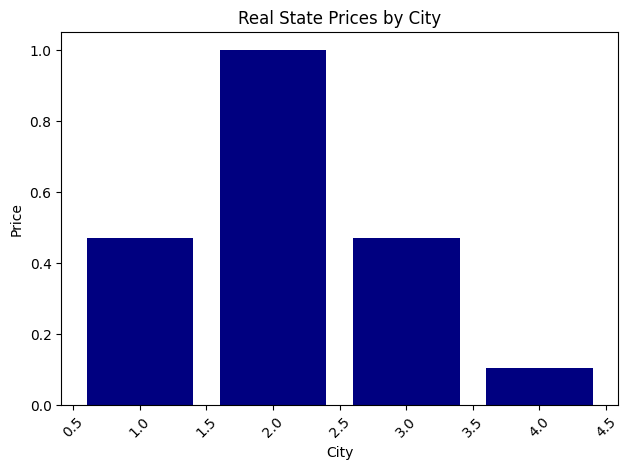

In [38]:
plt.bar(saAqar['city'], saAqar['price'], color = 'navy')
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Real State Prices by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
AqarCorr=saAqar.corr()
AqarCorr

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
city,1.000000,0.748616,0.011314,0.012165,-0.052526,0.077814,0.040146,0.142589,0.046503,-0.036749,...,0.003117,0.091375,0.106377,0.051833,0.026498,0.314535,-0.028684,0.075583,-0.092813,-0.026383
district,0.748616,1.000000,0.056911,0.030575,0.055189,0.101282,-0.017022,0.180112,0.046561,-0.037340,...,-0.007420,0.108563,0.184579,0.036431,0.108683,0.257901,-0.114205,0.119313,-0.136429,0.000649
front,0.011314,0.056911,1.000000,0.054891,0.105021,0.042991,-0.002367,0.013286,-0.003945,0.036625,...,0.031325,-0.007417,0.041934,0.038860,0.022744,-0.062728,0.031328,-0.013398,0.041758,0.091003
size,0.012165,0.030575,0.054891,1.000000,0.015636,-0.022723,-0.051090,-0.010755,0.012949,0.015873,...,0.032498,-0.013319,0.068783,0.025691,0.014664,0.009287,0.008271,-0.000941,-0.003249,0.049689
property_age,-0.052526,0.055189,0.105021,0.015636,1.000000,0.157030,-0.031885,0.132132,0.069257,-0.100948,...,0.044717,0.025838,0.002619,0.011311,0.056513,-0.182530,-0.120124,-0.093013,-0.084910,0.083113
bedrooms,0.077814,0.101282,0.042991,-0.022723,0.157030,1.000000,0.279280,0.180198,-0.066286,0.076614,...,-0.137800,0.124151,-0.124051,0.113640,0.007872,-0.019769,0.042322,0.040809,0.162624,0.015791
bathrooms,0.040146,-0.017022,-0.002367,-0.051090,-0.031885,0.279280,1.000000,0.263319,0.018724,0.153458,...,0.057557,0.186536,-0.061641,0.127178,0.051534,0.110064,0.164977,0.026242,0.035283,0.054605
livingrooms,0.142589,0.180112,0.013286,-0.010755,0.132132,0.180198,0.263319,1.000000,0.068162,0.033022,...,0.128089,0.238973,0.170298,0.143374,0.176507,0.050316,0.036522,0.147321,0.002050,0.233027
kitchen,0.046503,0.046561,-0.003945,0.012949,0.069257,-0.066286,0.018724,0.068162,1.000000,0.019841,...,0.227056,0.065802,0.091938,0.012585,0.038097,0.038072,-0.016127,0.001495,-0.070590,0.085761
garage,-0.036749,-0.037340,0.036625,0.015873,-0.100948,0.076614,0.153458,0.033022,0.019841,1.000000,...,0.099488,0.183746,0.092122,0.290075,0.057701,0.034871,0.124059,0.066848,0.081183,0.059123


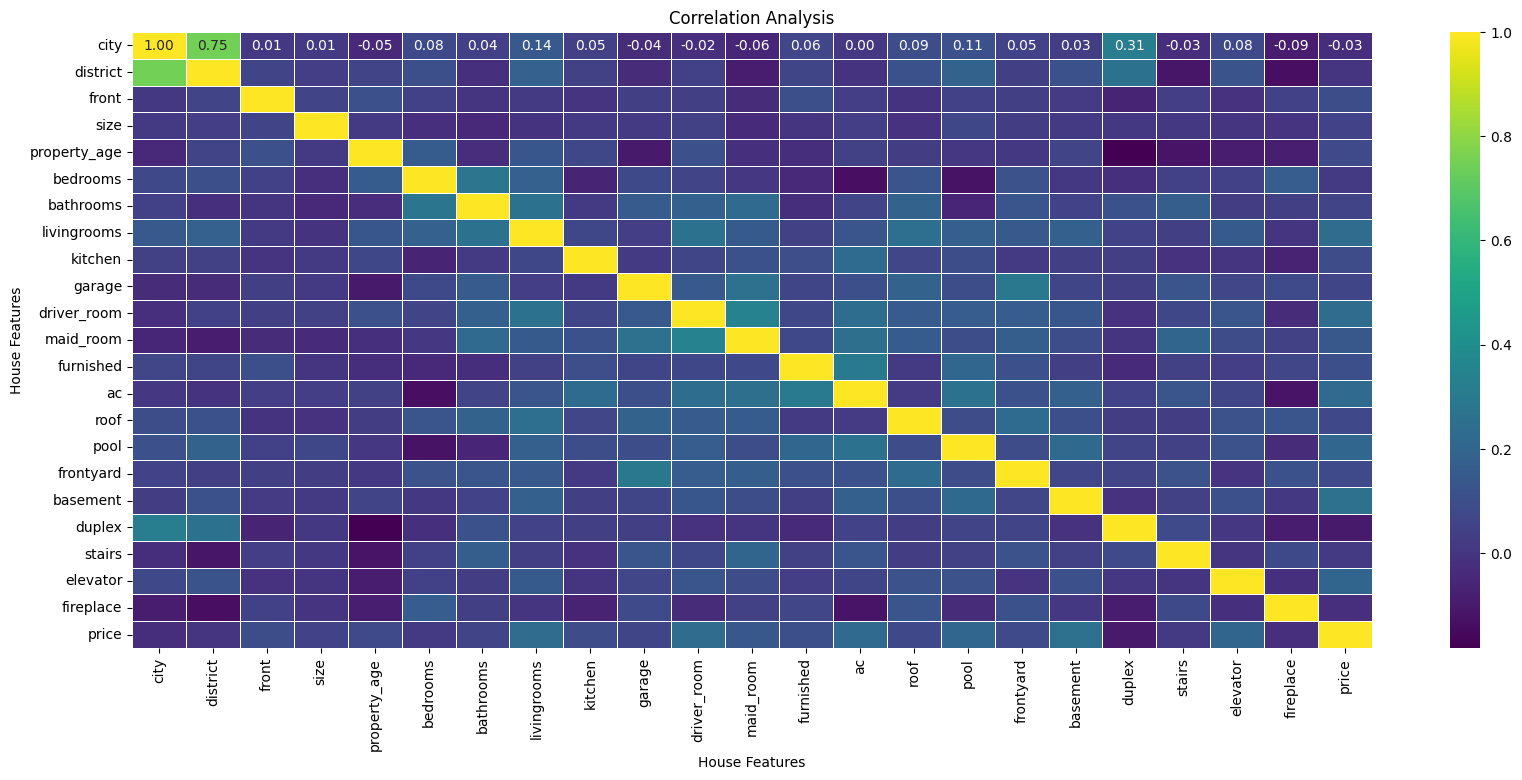

In [42]:
plt.figure(figsize=(20,8))
sns.heatmap(AqarCorr, annot=True, cmap='viridis', fmt=".2f", linewidth=.5)
plt.title("Correlation Analysis")
plt.xlabel('House Features')
plt.ylabel('House Features')
plt.show()

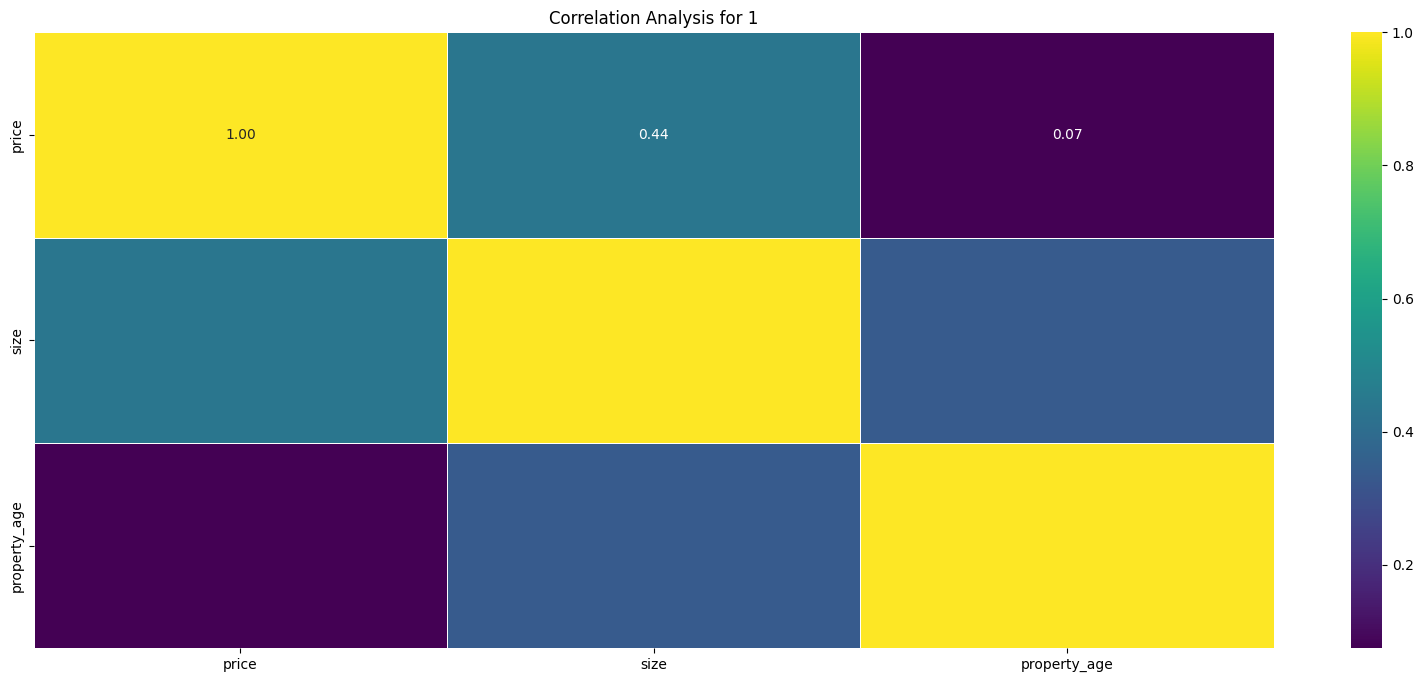

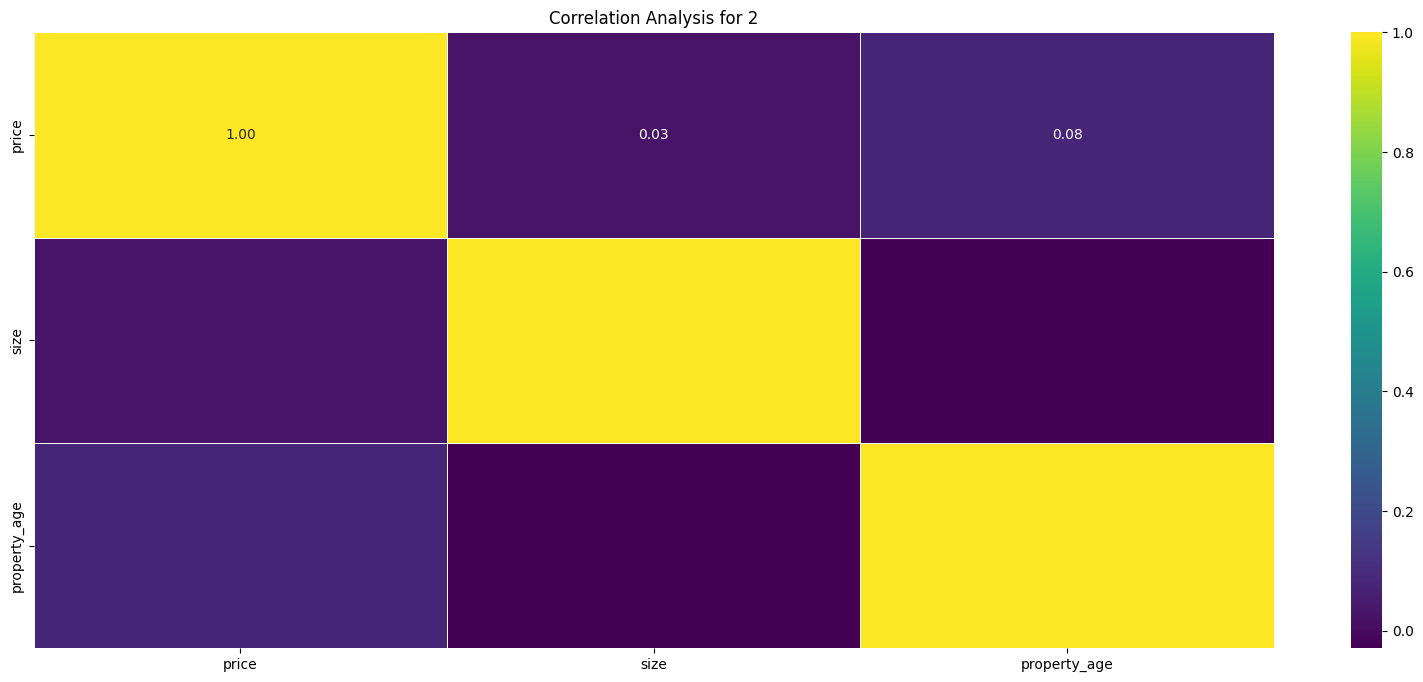

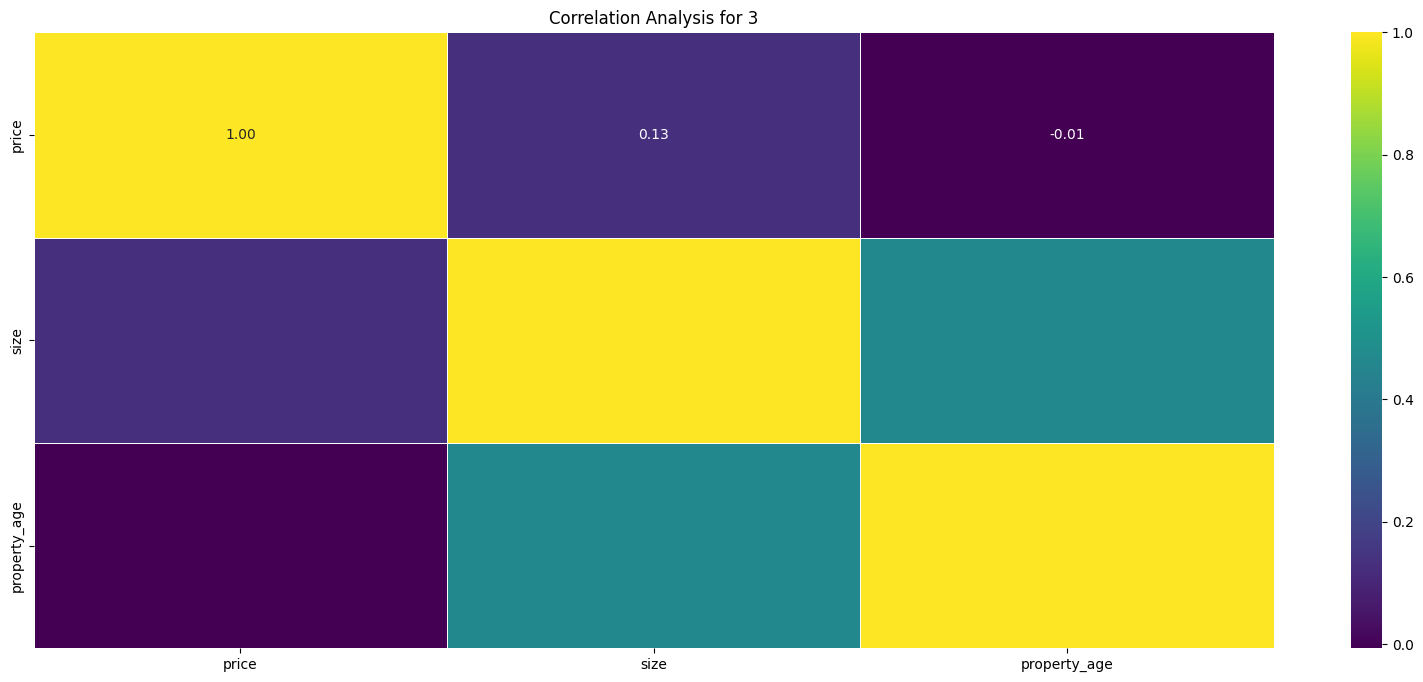

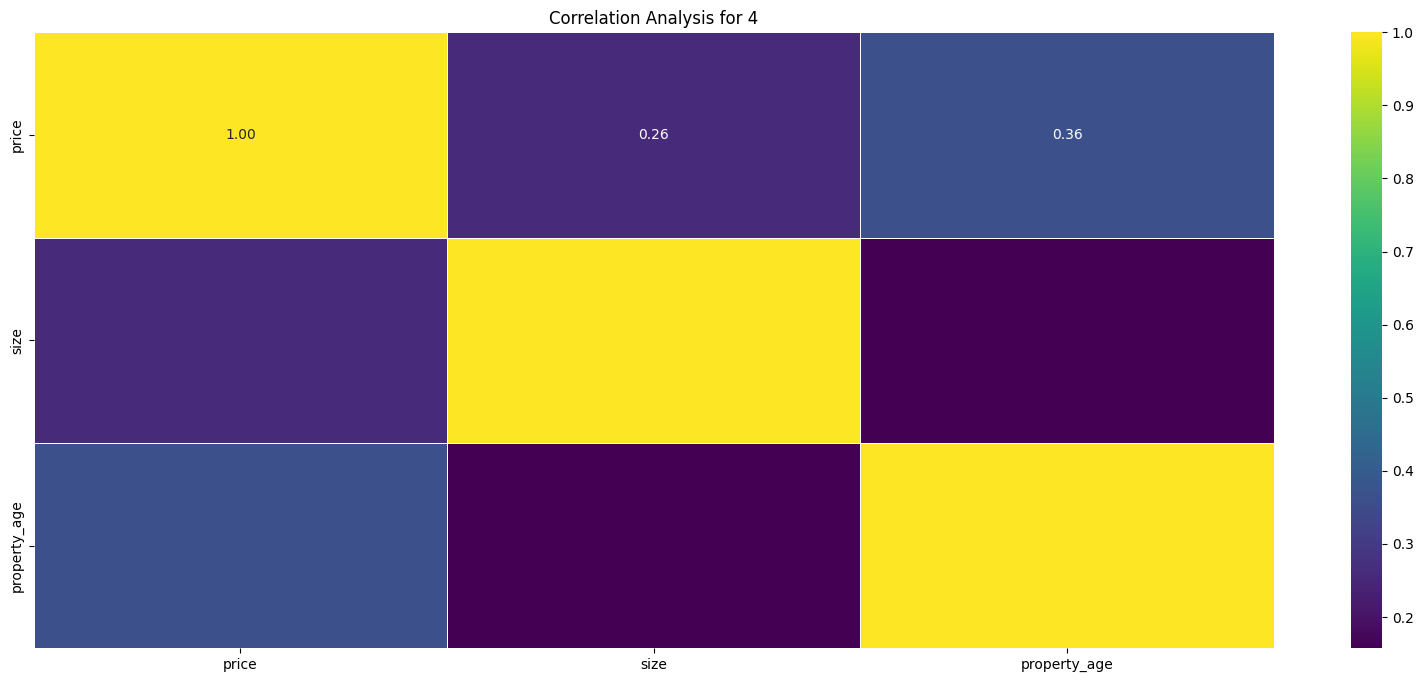

In [44]:
cities = saAqar['city'].unique()

for city in cities:
   
    city_data = saAqar[saAqar['city'] == city]
    
    city_corr = city_data[['price', 'size','property_age']].corr()
    
    plt.figure(figsize=(20,8))
    sns.heatmap(city_corr, annot=True, cmap='viridis', fmt=".2f", linewidth=.5)
    plt.title(f"Correlation Analysis for {city}")
    plt.show()

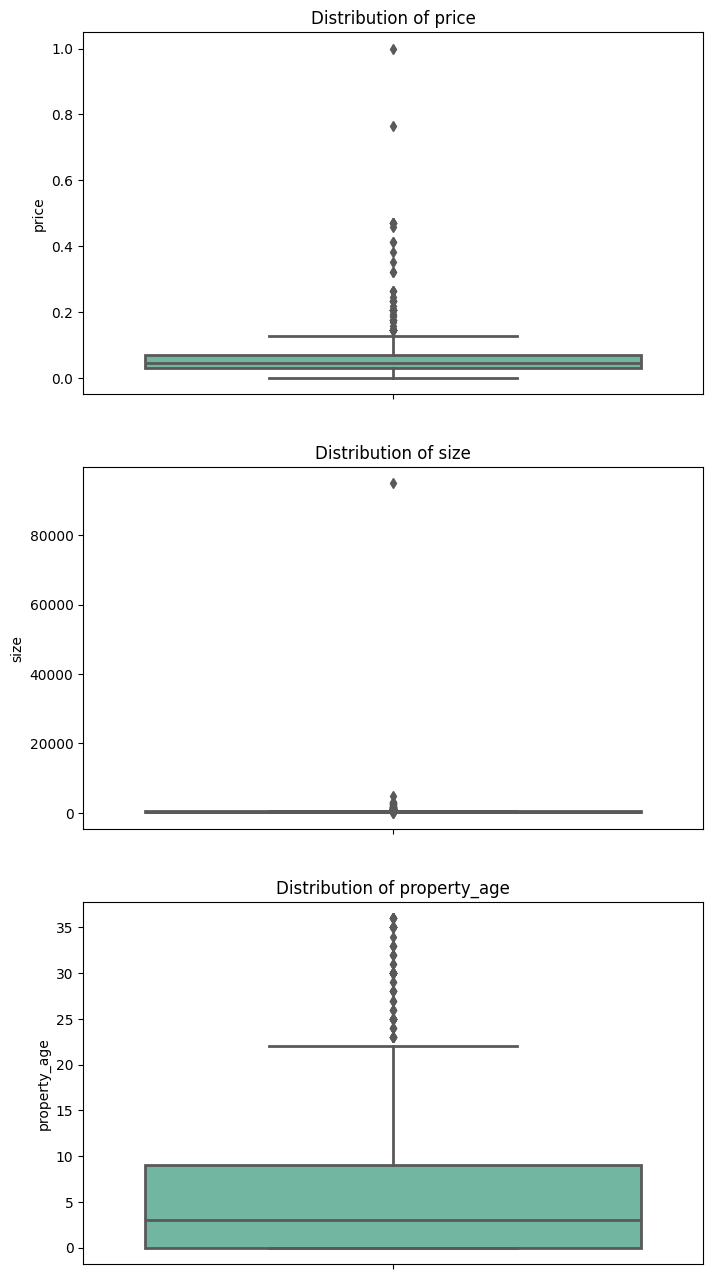

In [45]:
plt.figure(figsize=(8,16)) 
dist_cols=['price','size', 'property_age']
for i in range(0,len(dist_cols)):
    plt.subplot(3,1,i+1)
    sns.boxplot(data=saAqar, y=dist_cols[i], palette="Set2", linewidth=2)
    plt.title(f'Distribution of {dist_cols[i]}')

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [50]:
city_1_data = saAqar[saAqar['city'] == 1][['front', 'size', 'property_age']].values
city_2_data = saAqar[saAqar['city'] == 2][['front', 'size', 'property_age']].values
city_3_data = saAqar[saAqar['city'] == 3][['front', 'size', 'property_age']].values
city_4_data = saAqar[saAqar['city'] == 4][['front', 'size', 'property_age']].values

In [52]:
Y = saAqar['price']

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(city_1_data, Y[saAqar['city'] == 1], test_size=0.2, random_state=42)
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(city_2_data, Y[saAqar['city'] == 2], test_size=0.2, random_state=42)
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(city_3_data, Y[saAqar['city'] == 3], test_size=0.2, random_state=42)
X_train_4, X_test_4, Y_train_4, Y_test_4 = train_test_split(city_4_data, Y[saAqar['city'] == 4], test_size=0.2, random_state=42)

In [54]:
svr_model_1 = SVR(kernel='rbf')
svr_model_2 = SVR(kernel='rbf')
svr_model_3 = SVR(kernel='rbf')
svr_model_4 = SVR(kernel='rbf')

svr_model_1.fit(X_train_1, Y_train_1)
svr_model_2.fit(X_train_2, Y_train_2)
svr_model_3.fit(X_train_3, Y_train_3)
svr_model_4.fit(X_train_4, Y_train_4)

SVR()

In [56]:
Y_pred_1 = svr_model_1.predict(X_test_1)
Y_pred_2 = svr_model_2.predict(X_test_2)
Y_pred_3 = svr_model_3.predict(X_test_3)
Y_pred_4 = svr_model_4.predict(X_test_4)

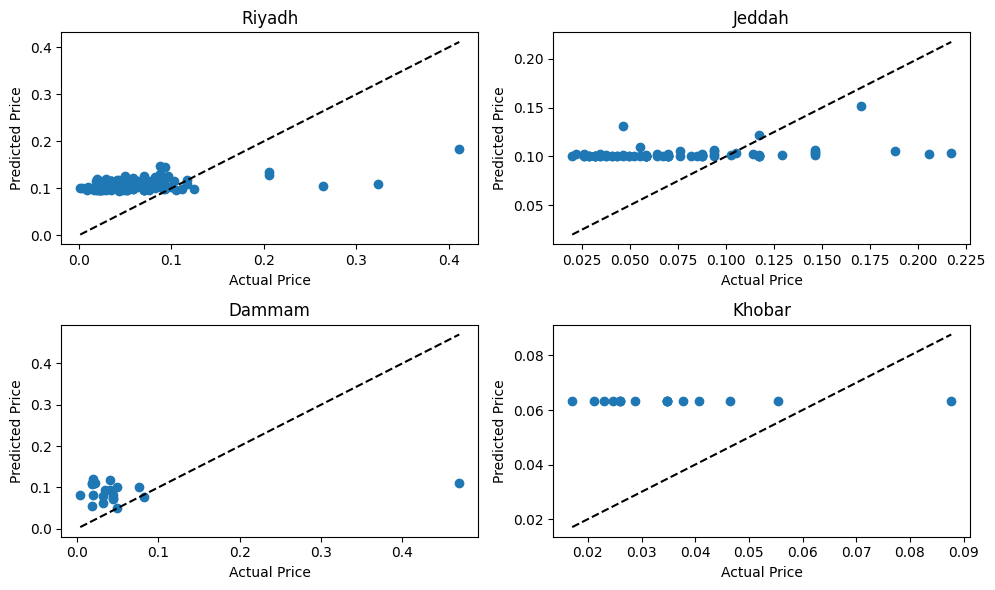

In [64]:
plt.figure(figsize=(10, 6))

plt.subplot(221)
plt.scatter(Y_test_1, Y_pred_1)
plt.plot([min(Y_test_1), max(Y_test_1)], [min(Y_test_1), max(Y_test_1)], 'k--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Riyadh')

plt.subplot(222)
plt.scatter(Y_test_2, Y_pred_2)
plt.plot([min(Y_test_2), max(Y_test_2)], [min(Y_test_2), max(Y_test_2)], 'k--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Jeddah')

# City 3
plt.subplot(223)
plt.scatter(Y_test_3, Y_pred_3)
plt.plot([min(Y_test_3), max(Y_test_3)], [min(Y_test_3), max(Y_test_3)], 'k--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Dammam')

# City 4
plt.subplot(224)
plt.scatter(Y_test_4, Y_pred_4)
plt.plot([min(Y_test_4), max(Y_test_4)], [min(Y_test_4), max(Y_test_4)], 'k--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Khobar')

plt.tight_layout()
plt.show()